Frame([[40, 39, 39, ..., 52, 53, 54],
       [40, 39, 39, ..., 51, 53, 55],
       [39, 39, 38, ..., 49, 52, 54],
       ...,
       [61, 60, 59, ..., 57, 59, 61],
       [63, 62, 61, ..., 58, 60, 62],
       [65, 64, 63, ..., 59, 61, 63]], dtype=uint8)
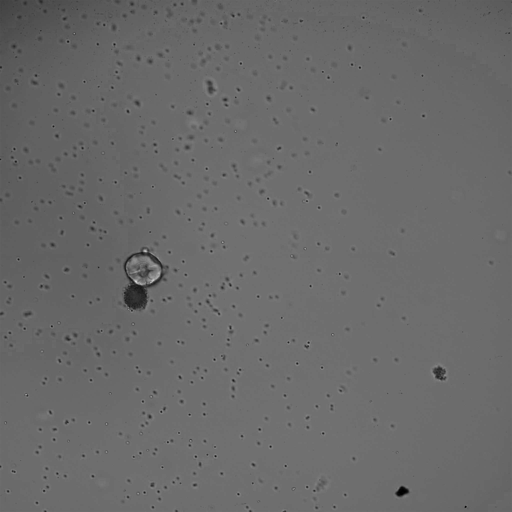

In [36]:
from __future__ import division, unicode_literals, print_function  # for compatibility with Python 2 and 3

import matplotlib as mpl
import matplotlib.pyplot as plt

# change the following to %matplotlib notebook for interactive plotting
%matplotlib inline

# Optionally, tweak styles.
mpl.rc('figure',  figsize=(10, 5))
mpl.rc('image', cmap='gray')

import numpy as np
import pandas as pdz
from pandas import DataFrame, Series  # for convenience

import pims
import trackpy as tp
import av
import os

@pims.pipeline
def gray(image):
    return image[:, :, 2]  # Take just the green channel

filename = "Z-stack_2020-09-11_13.40.14.avi"
path = os.path.join(sys.path[0], filename)
frames = gray(pims.Video(path))
frames[0]

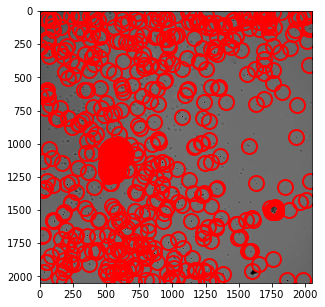

In [39]:
f = tp.locate(frames[0], 5, invert=True, minmass=30, maxsize=21, noise_size=1) #finds features
tp.annotate(f, frames[0])

In [49]:
f = tp.batch(frames, 5, invert=True, minmass=30, maxsize=21)


Frame 499: 705 features


Frame 499: 705 trajectories present.


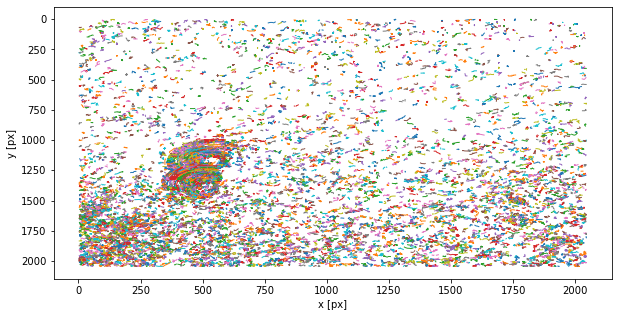

In [50]:
t = tp.link(f, 10, memory=3) #link them together
t1 = tp.filter_stubs(t, 5) #gets rid of small trajectories
plt.figure()
tp.plot_traj(t1); #plotting pretty lines

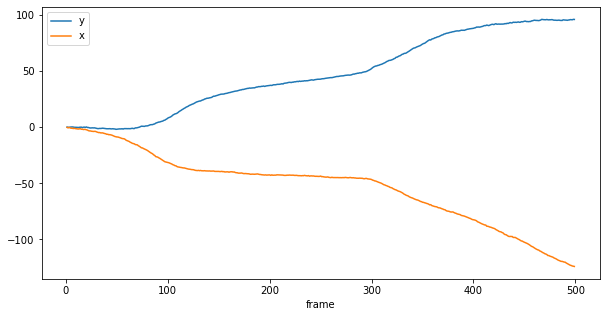

In [51]:
d = tp.compute_drift(t1) #find drift
d.plot()
plt.show()